In [1]:
# librairies

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# open the combined_square_storm_dataset.nc file

sq = xr.open_dataset('combined_square_storm_dataset.nc')
sq

<xarray.Dataset>
Dimensions:     (point: 158, coordinate: 4, storm: 96)
Coordinates:
  * point       (point) int32 0 1 2 3 4 5 6 7 ... 151 152 153 154 155 156 157
  * coordinate  (coordinate) int32 0 1 2 3
Dimensions without coordinates: storm
Data variables:
    tc_irad     (storm, point, coordinate) float64 ...

Coordinates:
  * point       (point) int32 0 1 2 3 4 5 6 7 ... 151 152 153 154 155 156 157
  * coordinate  (coordinate) int32 0 1 2 3


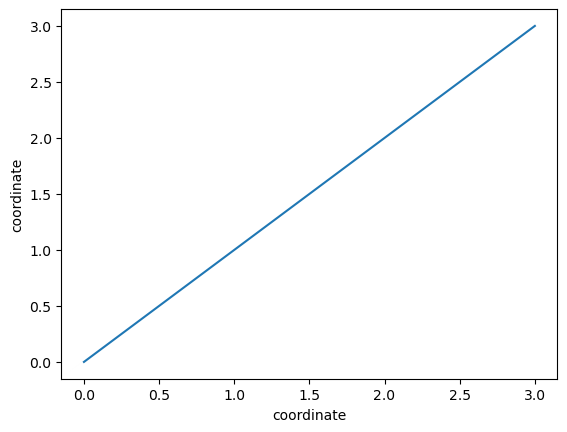

In [25]:
# extract the squares of the first storm

sq1 = sq.sel(storm=5)
sq1
print(sq1.coords)
sq1.coords['coordinate'].plot()
plt.show()

# the combined_square_storm_dataset.nc file does not contain the square coordinates, so let's switch with the .txt file

In [35]:
# opening the first storm tracks saved as tc_irad_1.txt

head = ['lon_east', 'lon_west', 'lat_south', 'lat_north']

tc_irad_1 = pd.read_csv('tc_irad/tc_irad_1.txt', sep=',')
tc_irad_1.columns = head

In [36]:
# creating the coordinates of the squares

lon_east = tc_irad_1['lon_east']
lon_west = tc_irad_1['lon_west']
lat_south = tc_irad_1['lat_south']
lat_north = tc_irad_1['lat_north']

In [5]:
# path to one variable 

local_path = '/Users/fabienaugsburger/myCloud/Unil/Master/Thesis/Datasets/Curnagl/ERA5_1990_2m_dewpoint_temperature.nc'

# extraction of the variable

dew_point = xr.open_dataset(local_path)
dew_point

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 2920)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-12-31T21:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [42]:
# slice the dew_point variable with the coordinates of the squares

for i in range(0, len(lon_east)):
    dew_point_sq1 = dew_point.sel(longitude=slice(lon_west[i], lon_east[i]), latitude=slice(lat_south[i], lat_north[i]))
    #dew_point_sq1.to_netcdf('dew_point_sq1.nc', mode='a', group='storm_'+str(i))

dew_point_sq1 = dew_point.sel(longitude=slice(lon_west[0], lon_east[0]), latitude=slice(lat_south[0], lat_north[0]))
dew_point_sq1

<xarray.Dataset>
Dimensions:    (longitude: 0, latitude: 0, time: 2920)
Coordinates:
  * longitude  (longitude) float32 
  * latitude   (latitude) float32 
  * time       (time) datetime64[ns] 1990-01-01 ... 1990-12-31T21:00:00
Data variables:
    d2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-10-13 21:02:30 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...